In [1303]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [1304]:
data = pd.read_csv('train.csv', index_col=0)
df = data.copy()

In [1305]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [1306]:
df[df['GarageType'].isna()]['SalePrice'].mean()

103317.28395061729

## Missing Values

In [1307]:
features_with_na = list(df.columns[pd.isna(df).sum()>0])
features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [1308]:
#missing values for categorical features

categorical_features_na = [feature for feature in df.columns if (data[feature].dtypes == 'O') and (feature in features_with_na)]
categorical_features_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [1309]:
#replacing missing categorical variable values with new 'Missing' label

def replace_na(dataset, features_w_na):
    data = dataset.copy()
    data[features_w_na] = data[features_w_na].fillna('Missing')
    return data

df = replace_na(df,categorical_features_na)

#df[categorical_features_na].isna().sum()

In [1310]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Missing,GdPrv,Shed,2500,5,2010,WD,Normal,266500


I am imputing each column based on the actual meaning of NA for that feature. For all remaining NAs, I will drop the row

In [1311]:

#df['Alley'] = df['Alley'].replace('Missing', 'No alley access')

In [1312]:
#imputing NAs in basement categorical features as 'No basement'
#basement_cat_features_na = [feature for feature in categorical_features_na if 'Bsmt' in feature]

#for feature in basement_cat_features_na:
    #df[feature] = df[feature].replace('Missing', 'No basement')

In [1313]:
#replacing NAs in Garage categorical features with 'No garage'
#garage_cat_features_na = [feature for feature in categorical_features_na if 'Garage' in feature] 

#for feature in garage_cat_features_na:
    #df[feature] = df[feature].replace('Missing', 'No garage')

In [1314]:
#replaceing Fireplace NAs with'No fireplace'

#df['FireplaceQu'] = df['FireplaceQu'].replace('Missing', 'No fireplace')

In [1315]:
#df[df['FireplaceQu'] == 'No fireplace']

In [1316]:
todrop= ['MasVnrType', 'MasVnrArea', 'Electrical']

data[todrop].isna()

meaningful_nas = [feature for feature in categorical_features_na if feature not in todrop]

for feature in meaningful_nas:
    df[feature]= df[feature].replace('Missing', 'not present')

In [1317]:
for feature in todrop:
    df = df.drop(df[df[feature] == 'Missing'].index)

In [1318]:
list(df.columns[pd.isna(df).sum()>0])

['LotFrontage', 'GarageYrBlt']

In [1319]:
df[df['BsmtCond'] == 'not present']['BsmtCond']

Id
18      not present
40      not present
91      not present
103     not present
157     not present
183     not present
260     not present
343     not present
363     not present
372     not present
393     not present
521     not present
533     not present
534     not present
554     not present
647     not present
706     not present
737     not present
750     not present
779     not present
869     not present
895     not present
898     not present
985     not present
1001    not present
1012    not present
1036    not present
1046    not present
1049    not present
1050    not present
1091    not present
1180    not present
1217    not present
1219    not present
1233    not present
1322    not present
1413    not present
Name: BsmtCond, dtype: object

### Missing Numerical Values 

In [1320]:
#replacing numerical values
numerical_features_na= [feature for feature in df.columns if (data[feature].dtypes != 'O') and (feature in features_with_na)]
numerical_features_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [1321]:
for feature in numerical_features_na:
    df[feature+'_na']=np.where(df[feature].isna(),1,0)
#df[df['MasVnrArea'].isna()]
#df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace = True)
df[df['LotFrontage_na'] == 1]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,60,RL,NaN,10382,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,not present,not present,Shed,350,11,2009,WD,Normal,200000,1,0,0
13,20,RL,NaN,12968,Pave,not present,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,not present,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,not present,not present,not present,0,9,2008,WD,Normal,144000,1,0,0
15,20,RL,NaN,10920,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,not present,GdWo,not present,0,5,2008,WD,Normal,157000,1,0,0
17,20,RL,NaN,11241,Pave,not present,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,not present,not present,Shed,700,3,2010,WD,Normal,149000,1,0,0
25,20,RL,NaN,8246,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,not present,MnPrv,not present,0,5,2010,WD,Normal,154000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,20,RL,NaN,12546,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,not present,not present,not present,0,4,2007,WD,Normal,182900,1,0,0
1432,120,RL,NaN,4928,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,not present,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,not present,not present,not present,0,10,2009,WD,Normal,143750,1,0,0
1442,120,RM,NaN,4426,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147

In [1322]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace = True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace = True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace = True)

In [1323]:
df_imputed_nums = df
df=df.drop(['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na'], axis=1)

In [1324]:
#df[df['LotFrontage_na'] == 1]
#df[df['MasVnrArea_na'] == 1]
#df[df['GarageYrBlt_na'] == 1]

In [1325]:
list(df.columns[pd.isna(df).sum()>0])

[]

In [1326]:
sum(df.isna().sum())

0

## Feature Engineering

#### Dealing with Ordinal Features

In [1327]:
condition_features = ['ExterCond', 'BsmtCond','GarageCond', 'HeatingQC']
qual_features = ['ExterQual','BsmtQual', 'KitchenQual','GarageQual','FireplaceQu']

In [1328]:
#changing "condition" features to ordinal numerical 

cleanup= {'Ex': 5, 'Gd':4, 'TA':3,'Fa':2, 'Po':1,'not present':0}
for feature in condition_features:
    df[feature] = df[feature].apply(lambda x: cleanup[x])

In [1329]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,3,PConc,Gd,3,No,GLQ,706,Unf,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,not present,Attchd,2003.0,RFn,2,548,TA,3,Y,0,61,0,0,0,0,not present,not present,not present,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,not present,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,3,CBlock,Gd,3,Gd,ALQ,978,Unf,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,3,Y,298,0,0,0,0,0,not present,not present,not present,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,3,PConc,Gd,3,Mn,GLQ,486,Unf,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,3,Y,0,42,0,0,0,0,not present,not present,not present,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,3,BrkTil,TA,4,No,ALQ,216,Unf,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,3,Y,0,35,272,0,0,0,not present,not present,not present,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,not present,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,3,PConc,Gd,3,Av,GLQ,655,Unf,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,3,Y,192,84,0,0,0,0,not present,not present,not present,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,3,PConc,Gd,3,No,Unf,0,Unf,0,953,953,GasA,5,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,3,Y,0,40,0,0,0,0,not present,not present,not present,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,3,CBlock,Gd,3,No,ALQ,790,Rec,163,589,1542,GasA,3,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,3,Y,349,0,0,0,0,0,not present,MnPrv,not present,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,4,Stone,TA,4,No,GLQ,275,Unf,0,877,1152,GasA,5,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,T

In [1330]:
#changing "quality" features to ordinal numerical 

for feature in qual_features:
    df[feature]=df[feature].apply(lambda x: cleanup[x])

In [1331]:
# Basement Ordinals

bsmt_expo_clean = {'Gd':4,'Av':3,'Mn':2,'No':1,'not present':0}

df['BsmtExposure'] = df['BsmtExposure'].apply(lambda x: bsmt_expo_clean[x])


In [1332]:
#Basement Finish type to numeric

bsmt_finish_types = ['BsmtFinType1','BsmtFinType2']

bsmt_finish_clean = {'GLQ': 6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'not present':0}

for feature in bsmt_finish_types:
    df[feature]=df[feature].apply(lambda x: bsmt_finish_clean[x])


In [1333]:
# Garage Finish ordinals

garage_finish_clean = {'Fin':3,'RFn':2,'Unf':1,'not present':0}

df['GarageFinish']=df['GarageFinish'].apply(lambda x: garage_finish_clean[x])

#### Combining SF to get Total SF

In [1334]:
df['TotalSF'] = df['TotalBsmtSF'] + df['GrLivArea'] + df['GarageArea']

In [1335]:
df=df.drop(['BsmtUnfSF','1stFlrSF','2ndFlrSF', 'TotalBsmtSF'], axis=1)

In [1336]:
#dropping the other Basement SF columns and keeping Total Basement SF
df['TotalFinishedBsmt'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df=df.drop(['BsmtFinSF1','BsmtFinSF2'], axis=1)

In [1337]:
#Creating a TotalBaths column and dropping the specific bathroom columns
df['TotalBath']=df['BsmtFullBath'] + df['FullBath'] + (.5* df['BsmtHalfBath']) + (.5* df['HalfBath'])
df=df.drop(['BsmtFullBath','FullBath','BsmtHalfBath', 'HalfBath'], axis=1)

In [1338]:
#Creating TotalPorch column and dropping individual porch columns
df['OutdoorFeatureSF']= df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['WoodDeckSF'] + df['OpenPorchSF']
df=df.drop(['3SsnPorch', 'ScreenPorch','EnclosedPorch','WoodDeckSF','OpenPorchSF'], axis=1)


In [1339]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,1,GasA,5,Y,SBrkr,0,1710,3,1,4,8,Typ,0,0,Attchd,2003.0,2,2,548,3,3,Y,0,not present,not present,not present,0,2,2008,WD,Normal,208500,3114,706,3.5,61
2,20,RL,80.0,9600,Pave,not present,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,1,GasA,5,Y,SBrkr,0,1262,3,1,3,6,Typ,1,3,Attchd,1976.0,2,2,460,3,3,Y,0,not present,not present,not present,0,5,2007,WD,Normal,181500,2984,978,2.5,298
3,60,RL,68.0,11250,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,1,GasA,5,Y,SBrkr,0,1786,3,1,4,6,Typ,1,3,Attchd,2001.0,2,2,608,3,3,Y,0,not present,not present,not present,0,9,2008,WD,Normal,223500,3314,486,3.5,42
4,70,RL,60.0,9550,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,1,GasA,4,Y,SBrkr,0,1717,3,1,4,7,Typ,1,4,Detchd,1998.0,1,3,642,3,3,Y,0,not present,not present,not present,0,2,2006,WD,Abnorml,140000,3115,216,2.0,307
5,60,RL,84.0,14260,Pave,not present,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,1,GasA,5,Y,SBrkr,0,2198,4,1,4,9,Typ,1,3,Attchd,2000.0,2,3,836,3,3,Y,0,not present,not present,not present,0,12,2008,WD,Normal,250000,4179,655,3.5,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,1,GasA,5,Y,SBrkr,0,1647,3,1,3,7,Typ,1,3,Attchd,1999.0,2,2,460,3,3,Y,0,not present,not present,not present,0,8,2007,WD,Normal,175000,3060,0,2.5,40
1457,20,RL,85.0,13175,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,3,3,CBlock,4,3,1,5,3,GasA,3,Y,SBrkr,0,2073,3,1,3,7,Min1,2,3,Attchd,1978.0,1,2,500,3,3,Y,0,not present,MnPrv,not present,0,2,2010,WD,Normal,210000,4115,953,3.0,349
1458,70,RL,66.0,9042,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,5,4,Stone,3,4,1,6,1,GasA,5,Y,SBrkr,0,2340,4,1,4,9,Typ,2,4,Attchd,1941.0,2,1,252,3,3,Y,0,not present,GdPrv,Shed,2500,5,2010,WD,Normal,266500,3744,275,2.0,60


## Engineering Year Variables

In [1340]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
year_features = [feature for feature in numerical_features if 'Year' in feature or 'Yr' in feature]

In [1341]:
for feature in year_features[0:3]:
    df[feature] = df['YrSold'] - df[feature]

In [1342]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,1,GasA,5,Y,SBrkr,0,1710,3,1,4,8,Typ,0,0,Attchd,5.0,2,2,548,3,3,Y,0,not present,not present,not present,0,2,2008,WD,Normal,208500,3114,706,3.5,61
2,20,RL,80.0,9600,Pave,not present,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,1,GasA,5,Y,SBrkr,0,1262,3,1,3,6,Typ,1,3,Attchd,31.0,2,2,460,3,3,Y,0,not present,not present,not present,0,5,2007,WD,Normal,181500,2984,978,2.5,298
3,60,RL,68.0,11250,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,1,GasA,5,Y,SBrkr,0,1786,3,1,4,6,Typ,1,3,Attchd,7.0,2,2,608,3,3,Y,0,not present,not present,not present,0,9,2008,WD,Normal,223500,3314,486,3.5,42
4,70,RL,60.0,9550,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,1,GasA,4,Y,SBrkr,0,1717,3,1,4,7,Typ,1,4,Detchd,8.0,1,3,642,3,3,Y,0,not present,not present,not present,0,2,2006,WD,Abnorml,140000,3115,216,2.0,307
5,60,RL,84.0,14260,Pave,not present,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,1,GasA,5,Y,SBrkr,0,2198,4,1,4,9,Typ,1,3,Attchd,8.0,2,3,836,3,3,Y,0,not present,not present,not present,0,12,2008,WD,Normal,250000,4179,655,3.5,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,8,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,1,GasA,5,Y,SBrkr,0,1647,3,1,3,7,Typ,1,3,Attchd,8.0,2,2,460,3,3,Y,0,not present,not present,not present,0,8,2007,WD,Normal,175000,3060,0,2.5,40
1457,20,RL,85.0,13175,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,32,22,Gable,CompShg,Plywood,Plywood,Stone,119.0,3,3,CBlock,4,3,1,5,3,GasA,3,Y,SBrkr,0,2073,3,1,3,7,Min1,2,3,Attchd,32.0,1,2,500,3,3,Y,0,not present,MnPrv,not present,0,2,2010,WD,Normal,210000,4115,953,3.0,349
1458,70,RL,66.0,9042,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,69,4,Gable,CompShg,CemntBd,CmentBd,None,0.0,5,4,Stone,3,4,1,6,1,GasA,5,Y,SBrkr,0,2340,4,1,4,9,Typ,2,4,Attchd,69.0,2,1,252,3,3,Y,0,not present,GdPrv,Shed,2500,5,2010,WD,Normal,266500,3744,275,2.0,60


In [1386]:
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

#### Outliers

In [1343]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in year_features+['Id']]

discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'TotalBath']

In [1344]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['Id'] and feature not in year_features]
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'GrLivArea',
 'GarageArea',
 'SalePrice',
 'TotalSF',
 'TotalFinishedBsmt',
 'OutdoorFeatureSF']

In [1345]:
#for feature in continuous_features:
    #data=df.copy()
    #data[feature] = data[feature]
    #plt.scatter(data[feature], data['SalePrice'])
    #plt.xlabel(feature)
    #plt.show()

In [1346]:
for feature in continuous_features:
    mean = df[feature].mean()
    std = df[feature].std()
    upper = mean + (2*std)
    lower = mean - (2*std)
    test = df[(df[feature]<upper) & (df[feature]>lower)]
    
    
#(df[feature]<upper) & test
df = test
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,1,GasA,5,Y,SBrkr,0,1710,3,1,4,8,Typ,0,0,Attchd,5.0,2,2,548,3,3,Y,0,not present,not present,not present,0,2,2008,WD,Normal,208500,3114,706,3.5,61
2,20,RL,80.0,9600,Pave,not present,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,1,GasA,5,Y,SBrkr,0,1262,3,1,3,6,Typ,1,3,Attchd,31.0,2,2,460,3,3,Y,0,not present,not present,not present,0,5,2007,WD,Normal,181500,2984,978,2.5,298
3,60,RL,68.0,11250,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,1,GasA,5,Y,SBrkr,0,1786,3,1,4,6,Typ,1,3,Attchd,7.0,2,2,608,3,3,Y,0,not present,not present,not present,0,9,2008,WD,Normal,223500,3314,486,3.5,42
4,70,RL,60.0,9550,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,1,GasA,4,Y,SBrkr,0,1717,3,1,4,7,Typ,1,4,Detchd,8.0,1,3,642,3,3,Y,0,not present,not present,not present,0,2,2006,WD,Abnorml,140000,3115,216,2.0,307
5,60,RL,84.0,14260,Pave,not present,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,1,GasA,5,Y,SBrkr,0,2198,4,1,4,9,Typ,1,3,Attchd,8.0,2,3,836,3,3,Y,0,not present,not present,not present,0,12,2008,WD,Normal,250000,4179,655,3.5,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,5,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,1,6,1,GasA,5,Y,SBrkr,0,1221,2,1,4,6,Typ,0,0,Attchd,5.0,2,2,400,3,3,Y,0,not present,not present,not present,0,10,2009,WD,Normal,185000,2842,410,3.0,113
1456,60,RL,62.0,7917,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,8,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,1,GasA,5,Y,SBrkr,0,1647,3,1,3,7,Typ,1,3,Attchd,8.0,2,2,460,3,3,Y,0,not present,not present,not present,0,8,2007,WD,Normal,175000,3060,0,2.5,40
1457,20,RL,85.0,13175,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,32,22,Gable,CompShg,Plywood,Plywood,Stone,119.0,3,3,CBlock,4,3,1,5,3,GasA,3,Y,SBrkr,0,2073,3,1,3,7,Min1,2,3,Attchd,32.0,1,2,500,3,3,Y,0,not present,MnPrv,not present,0,2,2010,WD,Normal,210000,4115,953,3.0,349


### Checking for Dominant Categorical Features

In [1347]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [1348]:
dom_check=[]
for feature in categorical_features:
    percent = df[feature].value_counts()[0]/len(df)
    dom_check.append(percent)

In [1349]:
categorical_percent = pd.DataFrame(list(zip(categorical_features, dom_check)))
categorical_percent.columns = ['Feature', 'Top Feature Percentage']
list(categorical_percent[categorical_percent['Top Feature Percentage']>.7]['Feature'])
categorical_percent=categorical_percent.sort_values('Top Feature Percentage')
categorical_percent

,Feature,Top Feature Percentage
8,Neighborhood,0.157781
16,Exterior2nd,0.350144
15,Exterior1st,0.358069
18,Foundation,0.440202
12,HouseStyle,0.501441
23,GarageType,0.592219
17,MasVnrType,0.597983
3,LotShape,0.641931
6,LotConfig,0.726225
0,MSZoning,0.786744


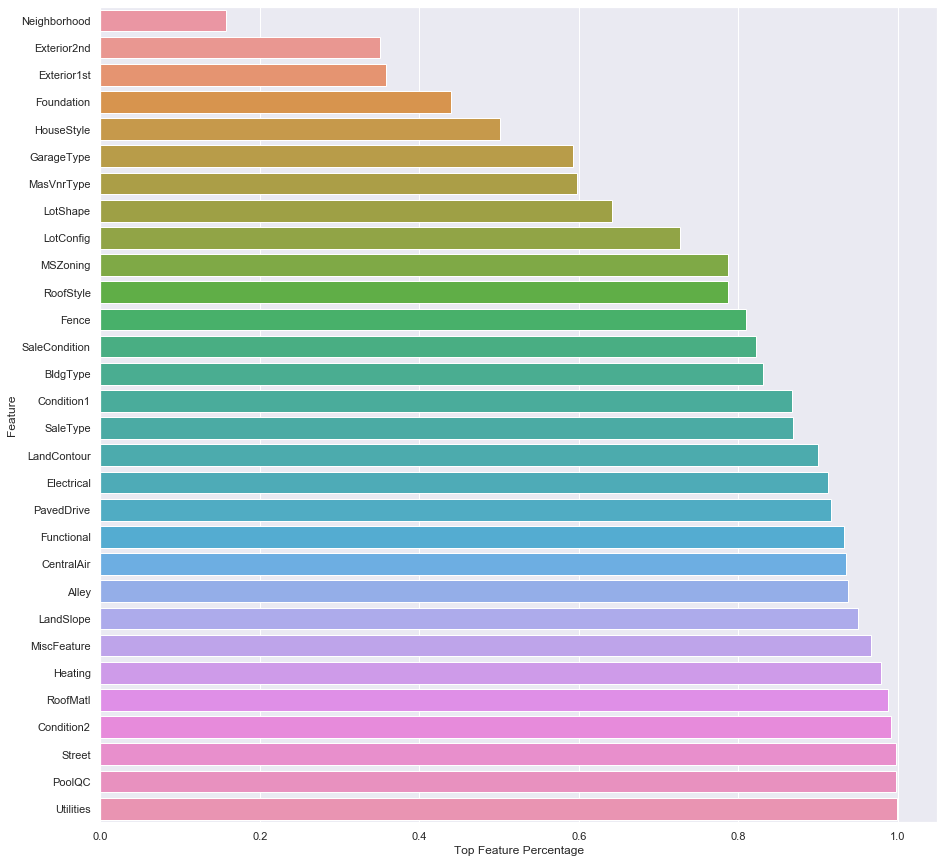

In [1387]:
import seaborn as sns

sns.barplot(x='Top Feature Percentage', y ='Feature', data=categorical_percent)
sns.set(rc={'figure.figsize':(12,12)})

In [1351]:
drop_cat = list(categorical_percent[categorical_percent['Top Feature Percentage']>.7]['Feature'])

df_copy = df

df_copy= df_copy.drop(drop_cat, axis=1)
df_copy

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,Reg,CollgCr,2Story,7,5,5,5,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,1,5,0,1710,3,1,4,8,0,0,Attchd,5.0,2,2,548,3,3,0,0,2,2008,208500,3114,706,3.5,61
2,20,80.0,9600,Reg,Veenker,1Story,6,8,31,31,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,1,5,0,1262,3,1,3,6,1,3,Attchd,31.0,2,2,460,3,3,0,0,5,2007,181500,2984,978,2.5,298
3,60,68.0,11250,IR1,CollgCr,2Story,7,5,7,6,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,1,5,0,1786,3,1,4,6,1,3,Attchd,7.0,2,2,608,3,3,0,0,9,2008,223500,3314,486,3.5,42
4,70,60.0,9550,IR1,Crawfor,2Story,7,5,91,36,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,1,4,0,1717,3,1,4,7,1,4,Detchd,8.0,1,3,642,3,3,0,0,2,2006,140000,3115,216,2.0,307
5,60,84.0,14260,IR1,NoRidge,2Story,8,5,8,8,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,1,5,0,2198,4,1,4,9,1,3,Attchd,8.0,2,3,836,3,3,0,0,12,2008,250000,4179,655,3.5,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,62.0,7500,Reg,Somerst,1Story,7,5,5,4,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,1,6,1,5,0,1221,2,1,4,6,0,0,Attchd,5.0,2,2,400,3,3,0,0,10,2009,185000,2842,410,3.0,113
1456,60,62.0,7917,Reg,Gilbert,2Story,6,5,8,7,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,1,5,0,1647,3,1,3,7,1,3,Attchd,8.0,2,2,460,3,3,0,0,8,2007,175000,3060,0,2.5,40
1457,20,85.0,13175,Reg,NWAmes,1Story,6,6,32,22,Plywood,Plywood,Stone,119.0,3,3,CBlock,4,3,1,5,3,3,0,2073,3,1,3,7,2,3,Attchd,32.0,1,2,500,3,3,0,0,2,2010,210000,4115,953,3.0,349


### Checking Dominant Discrete Features

In [1352]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in year_features+['Id']]

discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'TotalBath']

In [1353]:
for feature in discrete_features:
    print(df[feature].value_counts())

20     510
60     272
50     140
120     84
30      68
160     62
70      58
80      55
90      52
190     28
85      20
75      13
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
5     381
6     361
7     301
8     157
4     114
9      37
3      20
10     12
2       3
1       2
Name: OverallQual, dtype: int64
5    782
6    243
7    194
8     67
4     53
3     24
9     19
2      5
1      1
Name: OverallCond, dtype: int64
3    878
4    453
5     43
2     14
Name: ExterQual, dtype: int64
3    1224
4     133
2      28
5       2
1       1
Name: ExterCond, dtype: int64
3    627
4    579
5    111
0     36
2     35
Name: BsmtQual, dtype: int64
3    1246
4      60
2      44
0      36
1       2
Name: BsmtCond, dtype: int64
1    909
3    217
4    118
2    107
0     37
Name: BsmtExposure, dtype: int64
1    412
6    391
5    208
4    141
3    129
2     71
0     36
Name: BsmtFinType1, dtype: int64
1    1201
3      49
2      41
0      37
4      29
5      17
6      14
Name: BsmtFinTyp

In [1354]:
ls=[]
for feature in discrete_features:
    x = list(df[feature].value_counts())[0]/len(df)
    ls.append(x)
   
discrete_percent = pd.DataFrame(list(zip(discrete_features,ls)))
discrete_percent.columns= ['Feature', 'Top Feature Percentage']
discrete_percent = discrete_percent.sort_values('Top Feature Percentage')
discrete_percent

,Feature,Top Feature Percentage
24,MoSold,0.172190
1,OverallQual,0.274496
15,TotRmsAbvGrd,0.280259
8,BsmtFinType1,0.296830
25,TotalBath,0.318444
0,MSSubClass,0.367435
18,GarageFinish,0.422190
5,BsmtQual,0.451729
17,FireplaceQu,0.485591
16,Fireplaces,0.485591


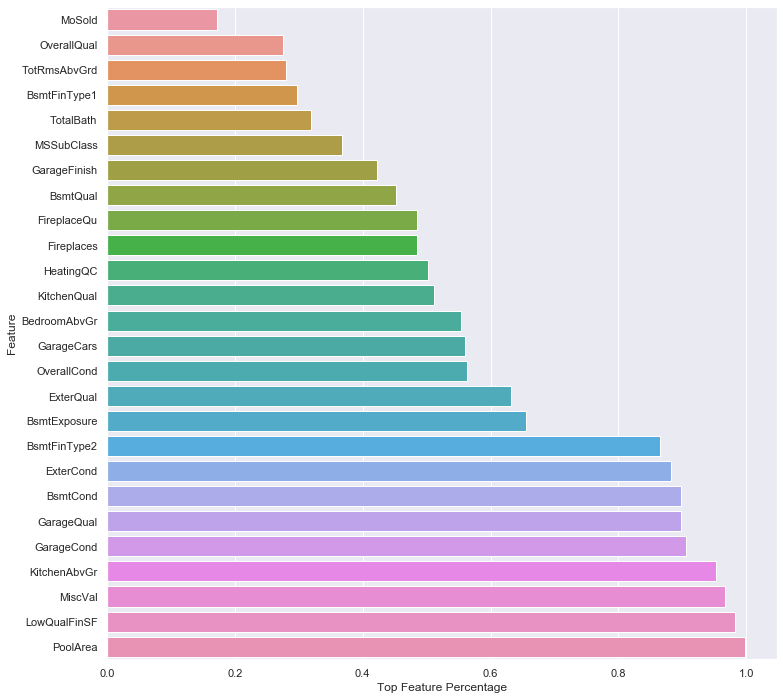

In [1355]:
sns.barplot(x='Top Feature Percentage', y ='Feature', data=discrete_percent)
sns.set(rc={'figure.figsize':(6,6)})

In [1356]:
#filtering out discrete variables that have one feature accounting for over 70% percent of observations

drop_discrete = list(discrete_percent[discrete_percent['Top Feature Percentage']>.7]['Feature'])

In [1357]:
df_copy = df_copy.drop(drop_discrete, axis=1)

In [1358]:
df_copy

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,SalePrice,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,Reg,CollgCr,2Story,7,5,5,5,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,5,1710,3,4,8,0,0,Attchd,5.0,2,2,548,2,2008,208500,3114,706,3.5,61
2,20,80.0,9600,Reg,Veenker,1Story,6,8,31,31,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,5,1262,3,3,6,1,3,Attchd,31.0,2,2,460,5,2007,181500,2984,978,2.5,298
3,60,68.0,11250,IR1,CollgCr,2Story,7,5,7,6,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,5,1786,3,4,6,1,3,Attchd,7.0,2,2,608,9,2008,223500,3314,486,3.5,42
4,70,60.0,9550,IR1,Crawfor,2Story,7,5,91,36,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,4,1717,3,4,7,1,4,Detchd,8.0,1,3,642,2,2006,140000,3115,216,2.0,307
5,60,84.0,14260,IR1,NoRidge,2Story,8,5,8,8,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,5,2198,4,4,9,1,3,Attchd,8.0,2,3,836,12,2008,250000,4179,655,3.5,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,62.0,7500,Reg,Somerst,1Story,7,5,5,4,VinylSd,VinylSd,None,0.0,4,PConc,4,1,6,5,1221,2,4,6,0,0,Attchd,5.0,2,2,400,10,2009,185000,2842,410,3.0,113
1456,60,62.0,7917,Reg,Gilbert,2Story,6,5,8,7,VinylSd,VinylSd,None,0.0,3,PConc,4,1,1,5,1647,3,3,7,1,3,Attchd,8.0,2,2,460,8,2007,175000,3060,0,2.5,40
1457,20,85.0,13175,Reg,NWAmes,1Story,6,6,32,22,Plywood,Plywood,Stone,119.0,3,CBlock,4,1,5,3,2073,3,3,7,2,3,Attchd,32.0,1,2,500,2,2010,210000,4115,953,3.0,349


### Removing Variables with Multicolinearity

#### Removing Features that are not correlated to Sale Price

In [1359]:
numerical_features_copy = [feature for feature in numerical_features if feature in df_copy.columns]


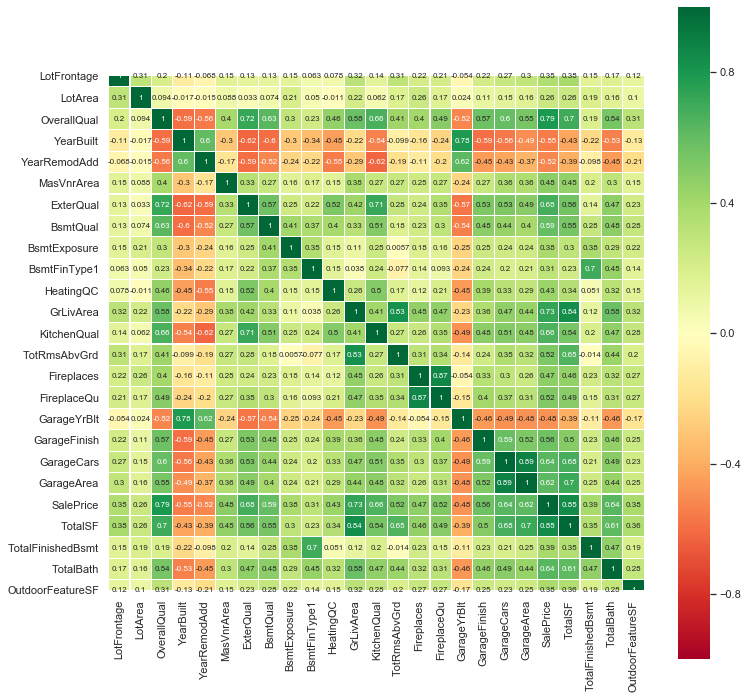

In [1388]:
golden_corr = df_copy[numerical_features_copy].corr()

sns.heatmap(golden_corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, linewidths = .1, annot = True, annot_kws={'size': 8}, square = True)
sns.set(rc={'figure.figsize':(15,15)})

In [1361]:
low_salecorr_drop = list(golden_corr[abs(golden_corr['SalePrice'])<.2]['SalePrice'].index)
#low_salecorr_drop=['MSSubClass','OverallCond','BedroomAbvGr','MoSold','YrSold']
df_copy = df_copy.drop(low_salecorr_drop, axis =1)


In [1362]:
df_copy

,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,Reg,CollgCr,2Story,7,5,5,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,5,1710,4,8,0,0,Attchd,5.0,2,2,548,208500,3114,706,3.5,61
2,80.0,9600,Reg,Veenker,1Story,6,31,31,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,5,1262,3,6,1,3,Attchd,31.0,2,2,460,181500,2984,978,2.5,298
3,68.0,11250,IR1,CollgCr,2Story,7,7,6,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,5,1786,4,6,1,3,Attchd,7.0,2,2,608,223500,3314,486,3.5,42
4,60.0,9550,IR1,Crawfor,2Story,7,91,36,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,4,1717,4,7,1,4,Detchd,8.0,1,3,642,140000,3115,216,2.0,307
5,84.0,14260,IR1,NoRidge,2Story,8,8,8,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,5,2198,4,9,1,3,Attchd,8.0,2,3,836,250000,4179,655,3.5,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7500,Reg,Somerst,1Story,7,5,4,VinylSd,VinylSd,None,0.0,4,PConc,4,1,6,5,1221,4,6,0,0,Attchd,5.0,2,2,400,185000,2842,410,3.0,113
1456,62.0,7917,Reg,Gilbert,2Story,6,8,7,VinylSd,VinylSd,None,0.0,3,PConc,4,1,1,5,1647,3,7,1,3,Attchd,8.0,2,2,460,175000,3060,0,2.5,40
1457,85.0,13175,Reg,NWAmes,1Story,6,32,22,Plywood,Plywood,Stone,119.0,3,CBlock,4,1,5,3,2073,3,7,2,3,Attchd,32.0,1,2,500,210000,4115,953,3.0,349


In [1363]:
low_salecorr_drop

['MSSubClass', 'OverallCond', 'BedroomAbvGr', 'MoSold', 'YrSold']

#### Removing Features that are highly correlated to one another

In [1364]:
numerical_features_copy = [feature for feature in numerical_features if feature in df_copy.columns]

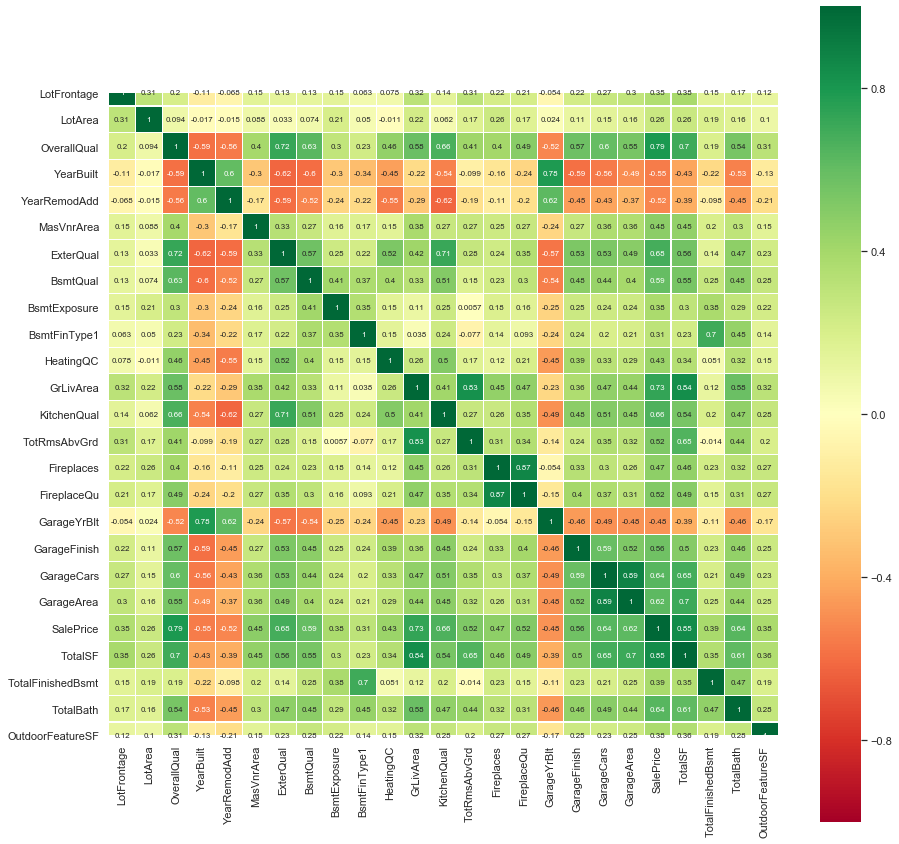

In [1365]:
golden_corr = df_copy[numerical_features_copy].corr()

sns.heatmap(golden_corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, linewidths = .1, annot = True, annot_kws={'size': 8}, square = True)
sns.set(rc={'figure.figsize':(15,15)})

In [1366]:
#Calulating VIF to test if there is multicolinearity

In [1367]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [1368]:
test = calc_vif(df_copy[numerical_features_copy])
test[test['VIF']<10]
test

,variables,VIF
0,LotFrontage,15.192997
1,LotArea,2.921676
2,OverallQual,78.677844
3,YearBuilt,9.650935
4,YearRemodAdd,4.478512
5,MasVnrArea,1.812597
6,ExterQual,98.274624
7,BsmtQual,39.357572
8,BsmtExposure,4.802869
9,BsmtFinType1,8.974761


In [1369]:
df_copy['LotArea'].describe()

count      1388.000000
mean      10120.545389
std        8868.318726
min        1300.000000
25%        7433.500000
50%        9318.500000
75%       11401.000000
max      215245.000000
Name: LotArea, dtype: float64

### Box Cox Transformation for Continuous Numercial Features

In [1370]:
from scipy import stats
i = [feature for feature in continuous_features if (feature in df_copy.columns) and (feature != 'SalePrice')]
test = df_copy.copy()
test[i]

,LotFrontage,LotArea,MasVnrArea,GrLivArea,GarageArea,TotalSF,TotalFinishedBsmt,OutdoorFeatureSF
Id,,,,,,,,
1,65.0,8450,196.0,1710,548,3114,706,61
2,80.0,9600,0.0,1262,460,2984,978,298
3,68.0,11250,162.0,1786,608,3314,486,42
4,60.0,9550,0.0,1717,642,3115,216,307
5,84.0,14260,350.0,2198,836,4179,655,276
...,...,...,...,...,...,...,...,...
1455,62.0,7500,0.0,1221,400,2842,410,113
1456,62.0,7917,0.0,1647,460,3060,0,40
1457,85.0,13175,119.0,2073,500,4115,953,349


In [1371]:
# lm = []
# for f in i:
#     transformed, lam = (stats.boxcox(test[f]+1))
#     test[f]=transformed
#     lm.append(lam)
    
# #pd.DataFrame(transformed)
# df_copy = test
# lm

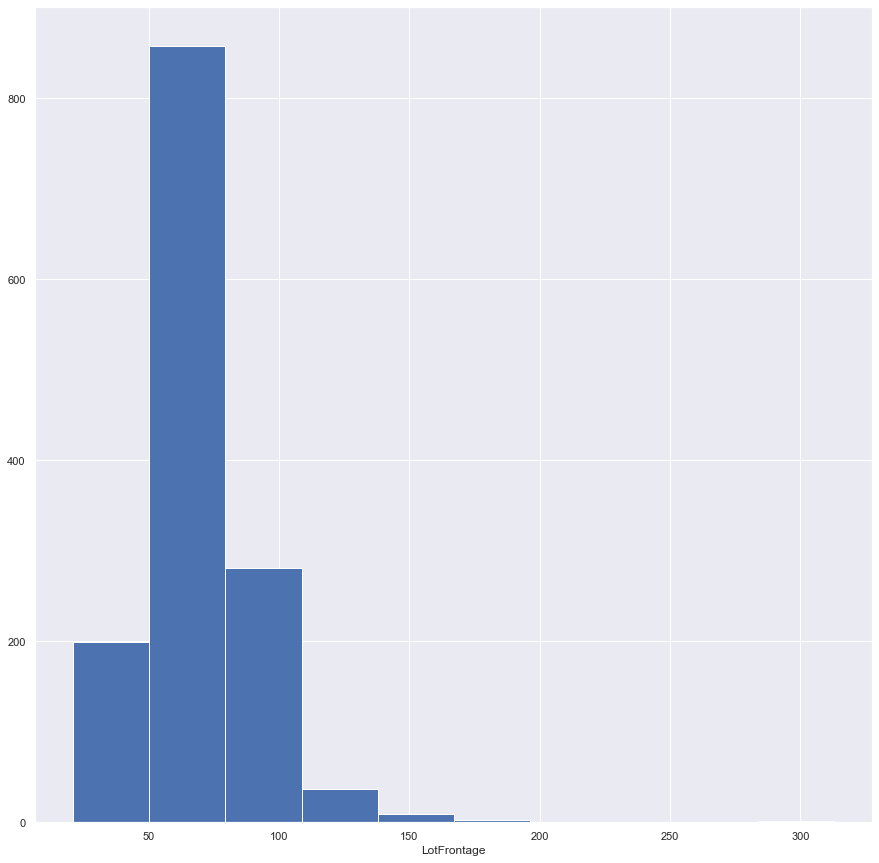

<Figure size 360x360 with 0 Axes>

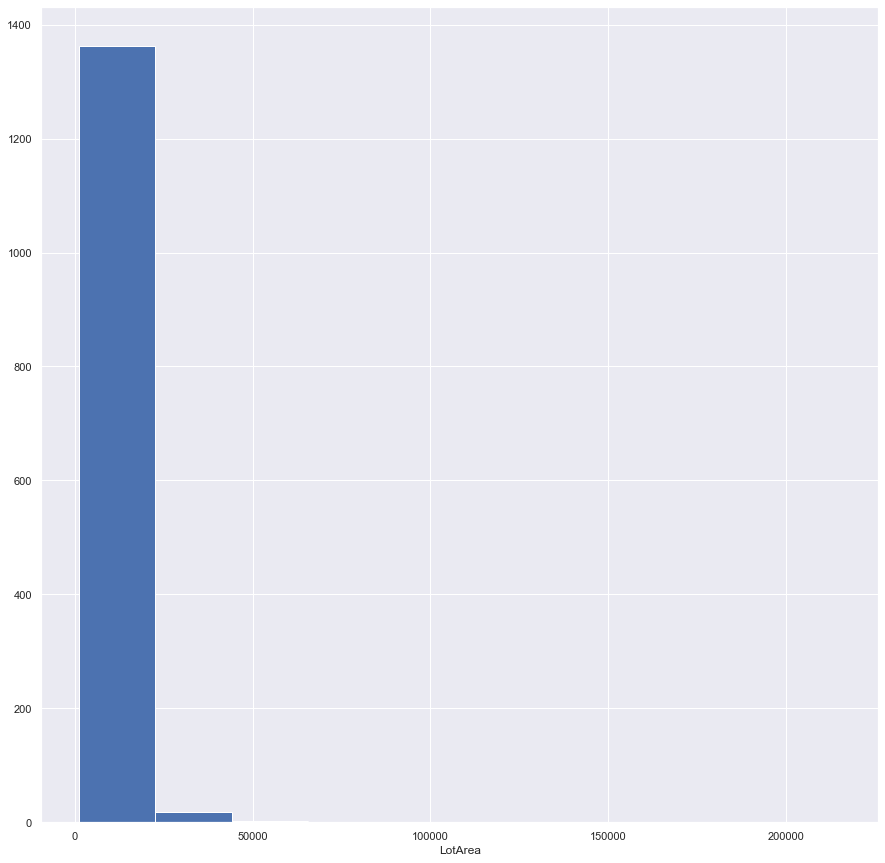

<Figure size 360x360 with 0 Axes>

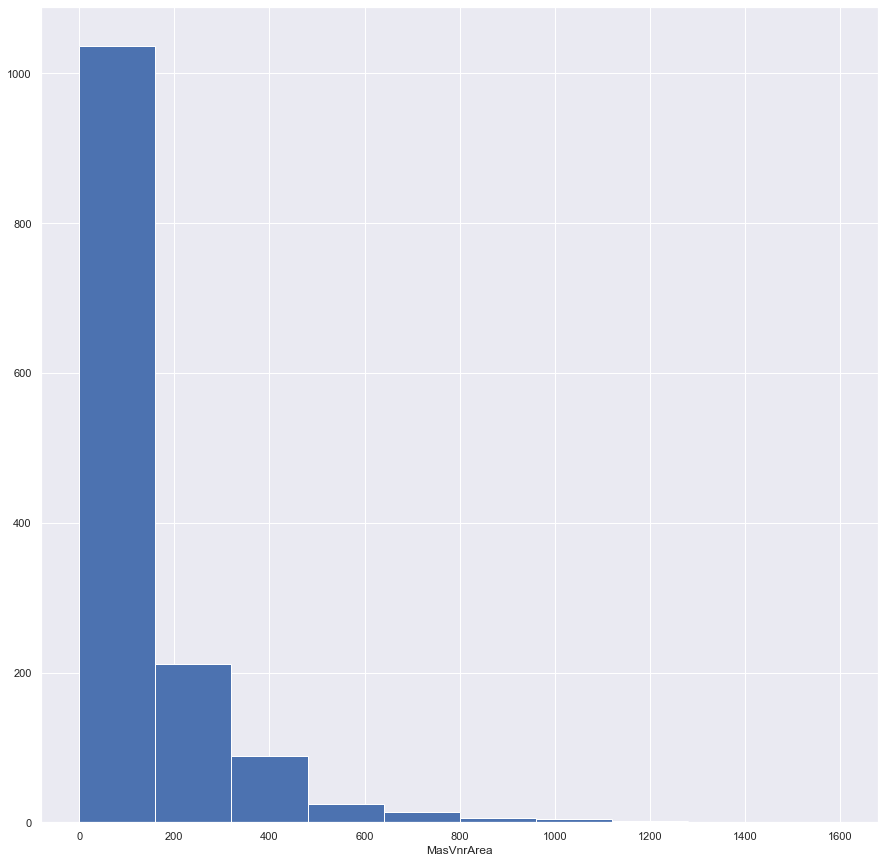

<Figure size 360x360 with 0 Axes>

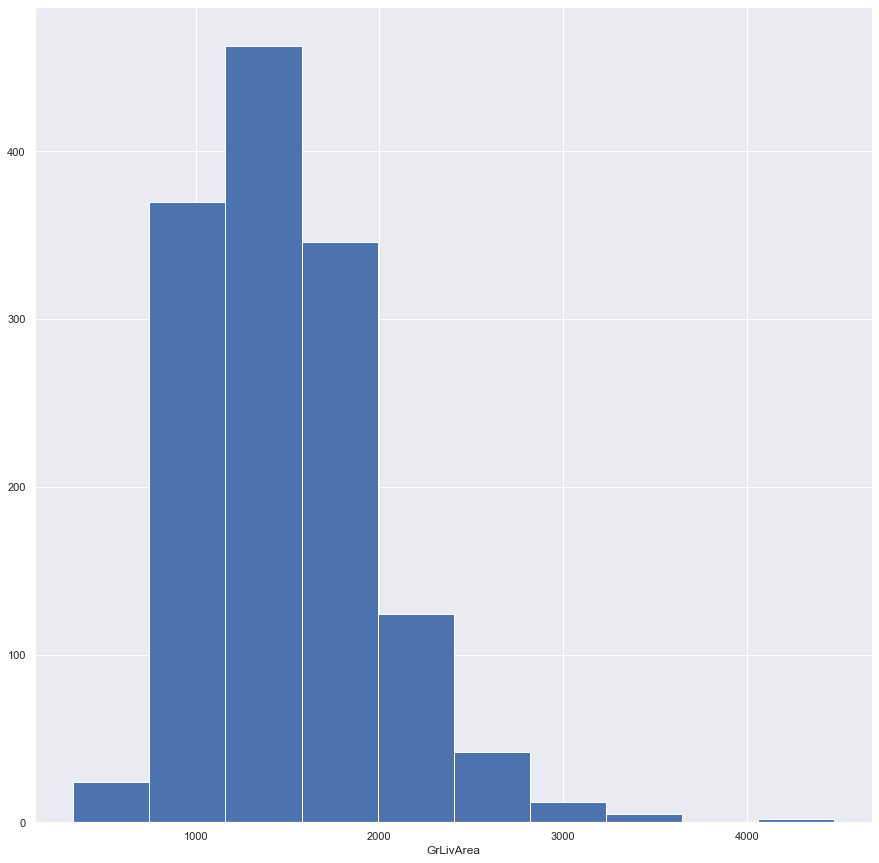

<Figure size 360x360 with 0 Axes>

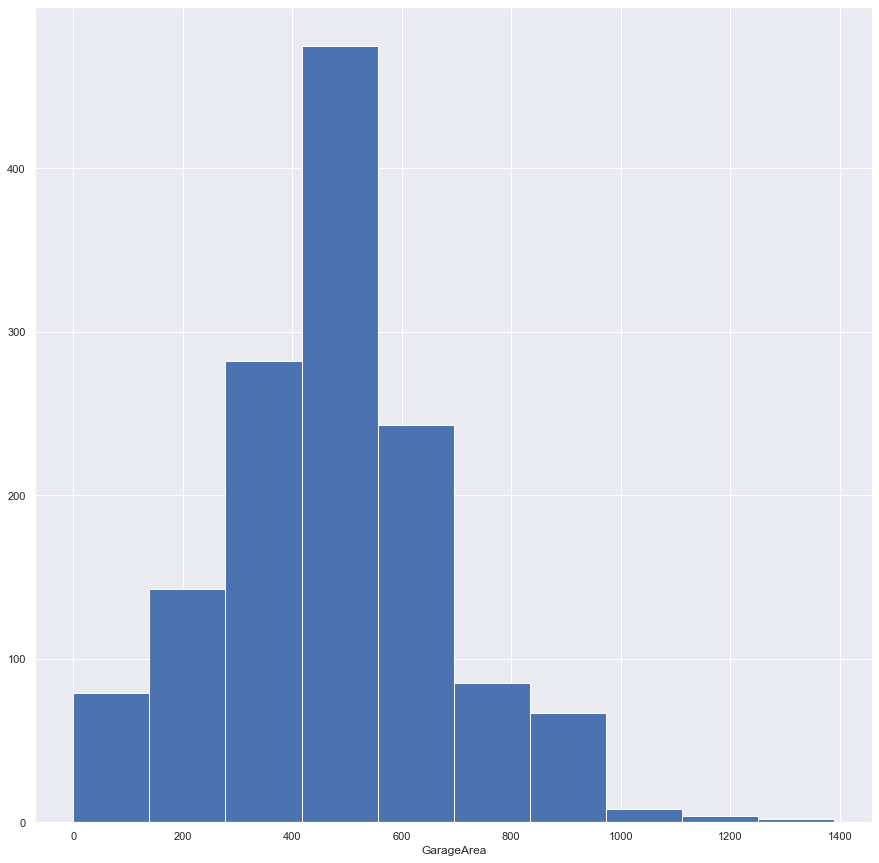

<Figure size 360x360 with 0 Axes>

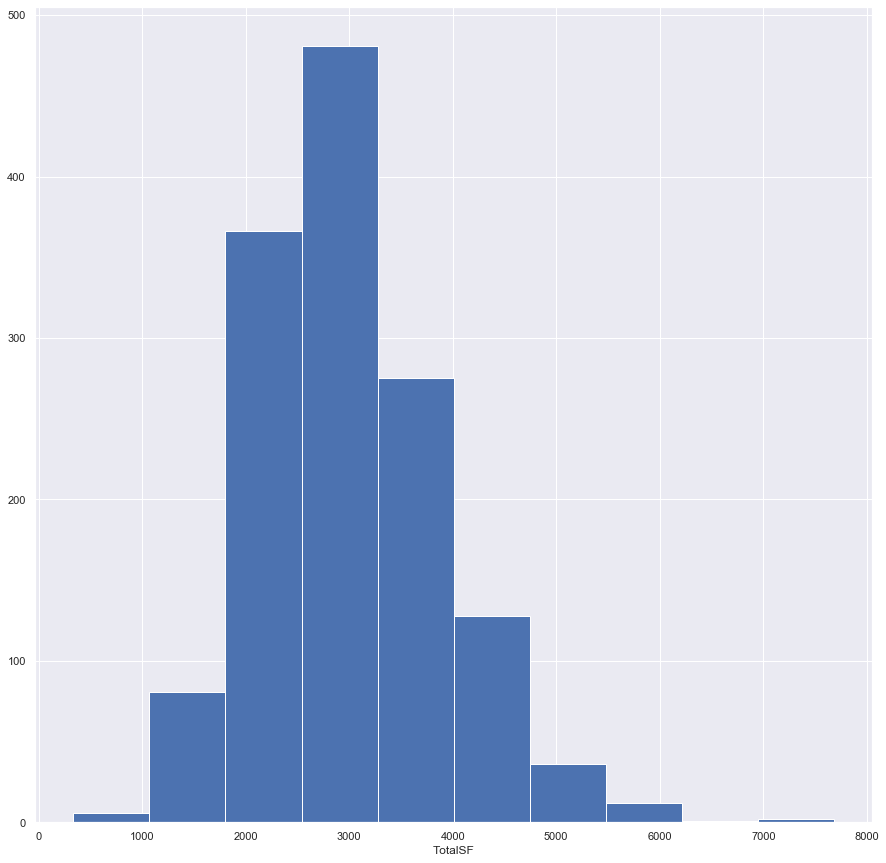

<Figure size 360x360 with 0 Axes>

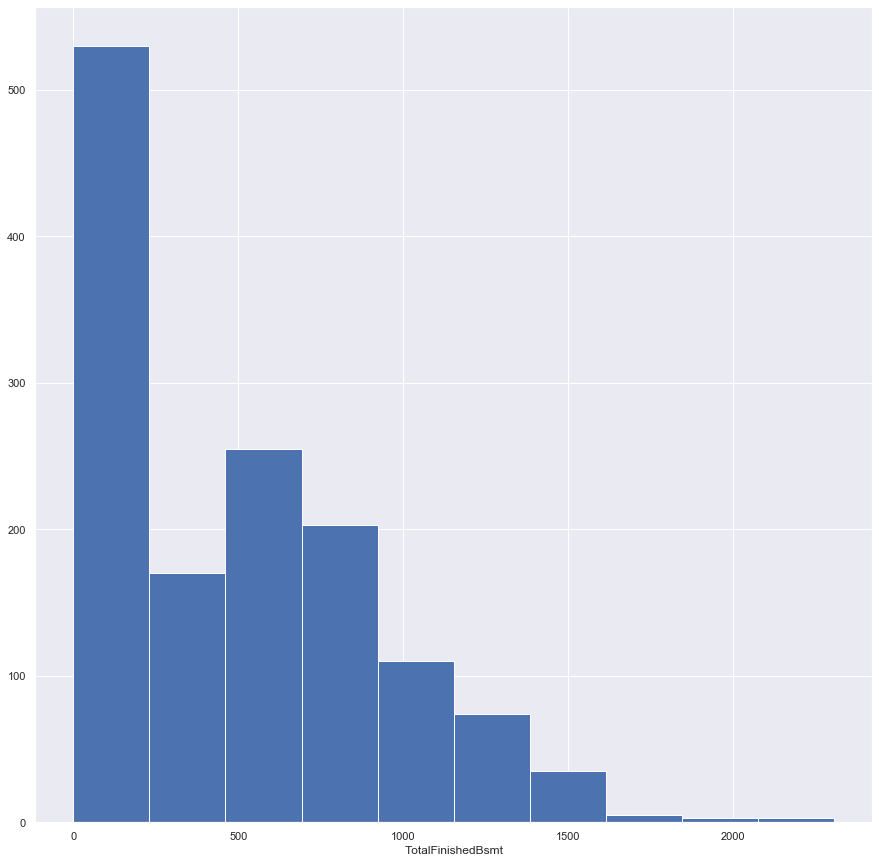

<Figure size 360x360 with 0 Axes>

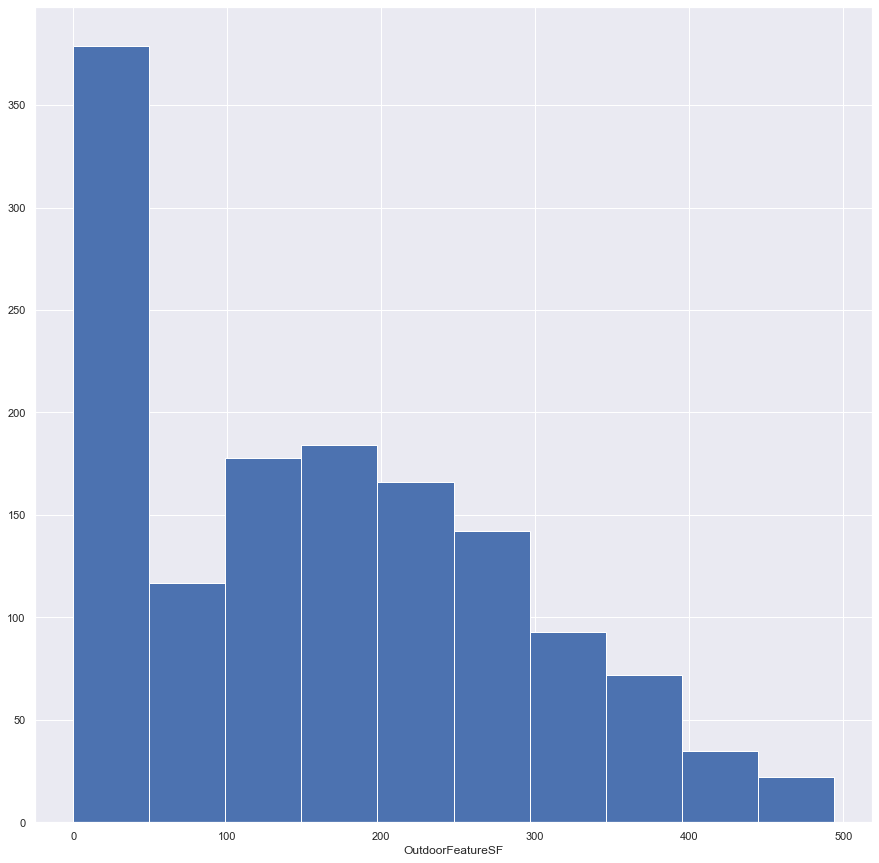

<Figure size 360x360 with 0 Axes>

In [1372]:
for feature in i:
    data=test.copy()
    plt.hist(data[feature])
    plt.xlabel(feature)
    plt.figure(figsize=[5,5])
    plt.show()

In [1373]:
rf_data = df_copy.copy()

In [1374]:
rf_data.to_csv('rf_training.csv')

In [1375]:
x = [df_copy[feature].mean() for feature in i]
list(zip(i, x))

[('LotFrontage', 69.29827089337176),
 ('LotArea', 10120.545389048992),
 ('MasVnrArea', 100.30619596541787),
 ('GrLivArea', 1486.3134005763688),
 ('GarageArea', 467.1152737752161),
 ('TotalSF', 2993.3170028818445),
 ('TotalFinishedBsmt', 475.1368876080692),
 ('OutdoorFeatureSF', 161.4171469740634)]

### Dummifying Categorical Variables

In [1376]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [1377]:
categorical_features

['LotShape',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'GarageType']

In [1378]:
temp = pd.get_dummies(df_copy, drop_first=True)

In [1379]:
#dummified version of the dataframe
temp

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_not present
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,5,196.0,4,4,1,6,5,1710,4,8,0,0,5.0,2,2,548,208500,3114,706,3.5,61,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,80.0,9600,6,31,31,0.0,3,4,4,5,5,1262,3,6,1,3,31.0,2,2,460,181500,2984,978,2.5,298,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
3,68.0,11250,7,7,6,162.0,4,4,2,6,5,1786,4,6,1,3,7.0,2,2,608,223500,3314,486,3.5,42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,60.0,9550,7,91,36,0.0,3,3,1,5,4,1717,4,7,1,4,8.0,1,3,642,140000,3115,216,2.0,307,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,84.0,14260,8,8,8,350.0,4,4,3,6,5,2198,4,9,1,3,8.0,2,3,836,250000,4179,655,3.5,276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7500,7,5,4,0.0,4,4,1,6,5,1221,4,6,0,0,5.0,2,2,400,185000,2842,410,3.0,113,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1456,62.0,7917,6,8,7,0.0,3,4,1,1,5,1647,3,7,1,3,8.0,2,2,460,175000,3060,0,2.5,40,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1457,85.0,13175,6,32,22,119.0,3,4,1,5,3,2073,3,7,2,3,3

### Dropping Irrelavent Neighborhoods

In [1380]:
#hoods = list(df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values().index)
#top_hoods = list(df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values()[-3:].index)
#bottom_hoods = list(df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values()[:3].index)

#keep_hoods = top_hoods + bottom_hoods
#drop_hoods = ['Neighborhood_'+h for h in hoods if h not in keep_hoods]

# drop_hoods=['Neighborhood_OldTown',
#  'Neighborhood_Edwards',
#  'Neighborhood_BrkSide',
#  'Neighborhood_Sawyer',
#  'Neighborhood_Blueste',
#  'Neighborhood_SWISU',
#  'Neighborhood_NAmes',
#  'Neighborhood_NPkVill',
#  'Neighborhood_Mitchel',
#  'Neighborhood_SawyerW',
#  'Neighborhood_Gilbert',
#  'Neighborhood_NWAmes',
#  'Neighborhood_Blmngtn',
#  'Neighborhood_CollgCr',
#  'Neighborhood_ClearCr',
#  'Neighborhood_Crawfor',
#  'Neighborhood_Veenker',
#  'Neighborhood_Somerst',
#  'Neighborhood_Timber']
# feat =[feature for feature in temp.columns if feature not in drop_hoods]
# temp = temp[feat]
temp

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_not present
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,5,196.0,4,4,1,6,5,1710,4,8,0,0,5.0,2,2,548,208500,3114,706,3.5,61,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,80.0,9600,6,31,31,0.0,3,4,4,5,5,1262,3,6,1,3,31.0,2,2,460,181500,2984,978,2.5,298,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
3,68.0,11250,7,7,6,162.0,4,4,2,6,5,1786,4,6,1,3,7.0,2,2,608,223500,3314,486,3.5,42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,60.0,9550,7,91,36,0.0,3,3,1,5,4,1717,4,7,1,4,8.0,1,3,642,140000,3115,216,2.0,307,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,84.0,14260,8,8,8,350.0,4,4,3,6,5,2198,4,9,1,3,8.0,2,3,836,250000,4179,655,3.5,276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7500,7,5,4,0.0,4,4,1,6,5,1221,4,6,0,0,5.0,2,2,400,185000,2842,410,3.0,113,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1456,62.0,7917,6,8,7,0.0,3,4,1,1,5,1647,3,7,1,3,8.0,2,2,460,175000,3060,0,2.5,40,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1457,85.0,13175,6,32,22,119.0,3,4,1,5,3,2073,3,7,2,3,3

In [1381]:
temp.columns.get_loc('TotalBath')

23

In [1382]:
#dummies = temp.iloc[:,26:]
#drop_dums=[]
#for feature in dummies.columns:
    #p = (dummies[feature].sum()/len(dummies))
    #if p < .01:
        #drop_dums.append(feature)
        #temp=temp.drop(feature, axis=1)
    

In [1383]:
#drop_dums

In [1384]:
temp

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_not present
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,5,196.0,4,4,1,6,5,1710,4,8,0,0,5.0,2,2,548,208500,3114,706,3.5,61,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,80.0,9600,6,31,31,0.0,3,4,4,5,5,1262,3,6,1,3,31.0,2,2,460,181500,2984,978,2.5,298,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
3,68.0,11250,7,7,6,162.0,4,4,2,6,5,1786,4,6,1,3,7.0,2,2,608,223500,3314,486,3.5,42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,60.0,9550,7,91,36,0.0,3,3,1,5,4,1717,4,7,1,4,8.0,1,3,642,140000,3115,216,2.0,307,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,84.0,14260,8,8,8,350.0,4,4,3,6,5,2198,4,9,1,3,8.0,2,3,836,250000,4179,655,3.5,276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7500,7,5,4,0.0,4,4,1,6,5,1221,4,6,0,0,5.0,2,2,400,185000,2842,410,3.0,113,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1456,62.0,7917,6,8,7,0.0,3,4,1,1,5,1647,3,7,1,3,8.0,2,2,460,175000,3060,0,2.5,40,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1457,85.0,13175,6,32,22,119.0,3,4,1,5,3,2073,3,7,2,3,3

In [1385]:
temp.to_csv('to_model.csv')

### Lasso Model

In [ ]:
X = temp.drop('SalePrice', axis=1)
y= temp['SalePrice']


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

In [ ]:
#do grid search to deterimine alpha

from sklearn.linear_model import Lasso
alpha_norm = 10

lasso = Lasso(normalize = True, alpha = alpha_norm)
lasso.fit(Xtrain, ytrain)


In [ ]:
lasso.score(Xtest, ytest)



In [ ]:
print(lasso.coef_)
print(lasso.intercept_)

In [ ]:
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] == 0:
        print(i)

In [ ]:
temp.iloc[:,112]